In [1]:
import numpy as np
import pandas as pd
import os

#### 0. Business statement: 

   *  Prediting the Readmission rates of a Hospital (healthcare) based on certain Biological parameters such as A1C_result, Diagnosis

### 1. Data Preprocessing

In [2]:
df = pd.read_csv("hospital_readmissions.csv")

In [3]:
df.head().T

,0,1,2,3,4
Patient_ID,1,2,3,4,5
Age,69,32,78,38,41
Gender,Other,Female,Female,Male,Female
Admission_Type,Emergency,Urgent,Urgent,Elective,Urgent
Diagnosis,Heart Disease,Diabetes,Heart Disease,Diabetes,Diabetes
Num_Lab_Procedures,33,81,75,77,50
Num_Medications,2,10,29,11,25
Num_Outpatient_Visits,4,4,4,2,3
Num_Inpatient_Visits,1,4,0,3,4
Num_Emergency_Visits,1,1,3,4,1


Here we have 5 categorical and 8 Non-Categorical Variables. They are:


* Categorical:
  - Gender - Sex of the patient -> Male/Female/Others.
  - Admission_Type - What sort of admission it is -> Elective, Urgent, Emergency.
  - Diagnosis - Type of diagnosis the patient underwent -> Heart Disease, Diabetes, Injury, Infection.
  - A1C_result - Glycated Hemoglobin A1C levels over past 2 to 3 months - > Normal, Abnormal.
  - Readmitted - whether the patient required readmission -> yes or no.

 
* Non-Categorical:
  - Age - Proper age of the patient -> (18 to 84)
  - Patient_ID - ID associated with a patient.
  - Num_Lab_Procedures - Number of Lab Procedures performed for that particular patient -> 0 to 100
  - Num_Medications - Number of Medications prescribed for the patient -> 0 to 100
  - Num_Outpatient_Visits - Number of visits a patient has made for consultation or same day exit -> 0 to 50
  - Num_Inpatient_Visits - Number of times the patient requires admission to a hospital or other healthcare facility -> 0 to 50
  - Num_Emergency_Visits - Number of times consulted a doctor or hospital for emergency -> 0 to 50
  - Num_Diagnosis - Total number of diagnosis the patient had been undergone -> 0 to 50

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


There are Null or NaN values in the A1C_Result. 


lets look for some outliers in all the columns.

In [5]:
df.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,51.665000,50.836000,15.661000,2.016000,2.019000,1.956000,5.011000
std,288.819436,21.989459,28.075137,8.230177,1.399894,1.416561,1.409983,2.664203
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000
50%,500.500000,50.500000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000
75%,750.250000,69.000000,75.000000,23.000000,3.000000,3.000000,3.000000,7.000000
max,1000.000000,150.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000


There is an outlier in the Age column where the maximum age is 150.
* Possible replaces:
  - Replace by the most appropriate age that has similar 'Diagnosis', 'Num_medications', 'Num_Lab_Procedures', 'Num_Inpatient_visits' 

In [6]:
final_hosp_data = df[df['Age'] < 150]
final_hosp_data_outlier = df[df['Age'] == 150].reset_index()
#display(final_hosp_data_outlier)
for i in range(len(final_hosp_data_outlier)):

    gender = final_hosp_data_outlier['Gender'].loc[i]
    admission_type = final_hosp_data_outlier['Admission_Type'].loc[i]
    diagnosis = final_hosp_data_outlier['Diagnosis'].loc[i]
    num_lab_procedures = final_hosp_data_outlier['Num_Lab_Procedures'].loc[i]
    ind = final_hosp_data_outlier['index'].loc[i]
    
    age_outlier = final_hosp_data[(final_hosp_data['Gender'] == gender) & (final_hosp_data['Admission_Type'] == admission_type) 
                         & (final_hosp_data['Num_Lab_Procedures'] > num_lab_procedures-10) & (final_hosp_data['Diagnosis'] == diagnosis) ]
    #display()
    print('Patient_ID', df.loc[ind, 'Patient_ID'], 'Age =', df.loc[ind, 'Age'], " --> ", int(age_outlier['Age'].mean()))
    #print(age_outlier['Age'].mode())
    df.loc[ind, 'Age'] =  int(age_outlier['Age'].mean()) 

Patient_ID 51 Age = 150  -->  58
Patient_ID 52 Age = 150  -->  57
Patient_ID 53 Age = 150  -->  57
Patient_ID 54 Age = 150  -->  60
Patient_ID 55 Age = 150  -->  45
Patient_ID 56 Age = 150  -->  50
Patient_ID 57 Age = 150  -->  54
Patient_ID 58 Age = 150  -->  54
Patient_ID 59 Age = 150  -->  46
Patient_ID 60 Age = 150  -->  31


In [7]:
df['Age'].describe()

count    1000.000000
mean       50.677000
std        19.658309
min        18.000000
25%        34.000000
50%        50.000000
75%        68.000000
max        84.000000
Name: Age, dtype: float64

#### As far as modeling is concerned the Patient_ID is not that useful. It is not a parameter that is going to affect the readmission directly.
#### We drop it

In [8]:
df = df.drop(columns=['Patient_ID'])

In [9]:
df.head().T

,0,1,2,3,4
Age,69,32,78,38,41
Gender,Other,Female,Female,Male,Female
Admission_Type,Emergency,Urgent,Urgent,Elective,Urgent
Diagnosis,Heart Disease,Diabetes,Heart Disease,Diabetes,Diabetes
Num_Lab_Procedures,33,81,75,77,50
Num_Medications,2,10,29,11,25
Num_Outpatient_Visits,4,4,4,2,3
Num_Inpatient_Visits,1,4,0,3,4
Num_Emergency_Visits,1,1,3,4,1
Num_Diagnoses,5,6,5,9,3


In [10]:
df['Readmitted'].value_counts()

Readmitted
No     503
Yes    497
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

#### The A1C_Result is an important parameter related to Diabetes/Blood sugar levels from the past 2 or 3 months.
#### So, we do not wish to drop the na values as the dataset has less data points.
#### We replace the nan's by Unkown, meaning, the A1C_Result is rather Unknown than being NaN.

In [12]:
df['A1C_Result'] = df['A1C_Result'].fillna('Unknown')

In [13]:
df.isnull().sum()

Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

In [14]:
#df = pd.get_dummies(df, columns=list(set(cat_columns) - set(['Readmitted'])))  # target variable should not be encoded.

In [15]:
df['Readmitted'] = df['Readmitted'].replace({'Yes': 1, 'No': 0})

C:\Users\vikki\AppData\Local\Temp\ipykernel_14488\876538792.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Readmitted'] = df['Readmitted'].replace({'Yes': 1, 'No': 0})


In [16]:
df['Readmitted'] = df['Readmitted'].astype(bool)
df['Readmitted'].unique()

array([ True, False])

In [17]:
df['Admission_Type'].value_counts()

Admission_Type
Elective     345
Emergency    337
Urgent       318
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    1000 non-null   int64 
 1   Gender                 1000 non-null   object
 2   Admission_Type         1000 non-null   object
 3   Diagnosis              1000 non-null   object
 4   Num_Lab_Procedures     1000 non-null   int64 
 5   Num_Medications        1000 non-null   int64 
 6   Num_Outpatient_Visits  1000 non-null   int64 
 7   Num_Inpatient_Visits   1000 non-null   int64 
 8   Num_Emergency_Visits   1000 non-null   int64 
 9   Num_Diagnoses          1000 non-null   int64 
 10  A1C_Result             1000 non-null   object
 11  Readmitted             1000 non-null   bool  
dtypes: bool(1), int64(7), object(4)
memory usage: 87.0+ KB


#### Outlier Detection through box plots

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Boxplot Num_Emergency_Visits'}, xlabel='Num_Emergency_Visits'>

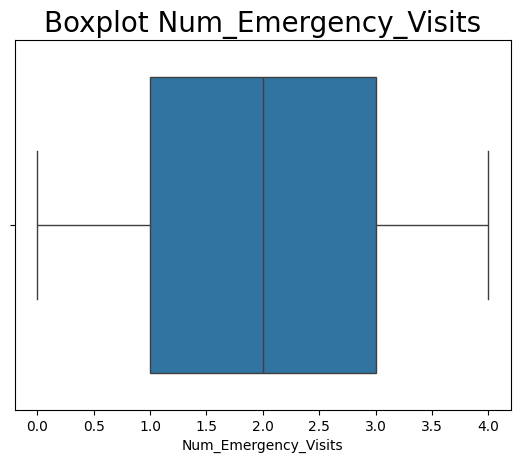

In [23]:
plt.title("Boxplot Num_Emergency_Visits", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Num_Emergency_Visits"])

<Axes: title={'center': 'Boxplot Num_Inpatient_Visits'}, xlabel='Num_Inpatient_Visits'>

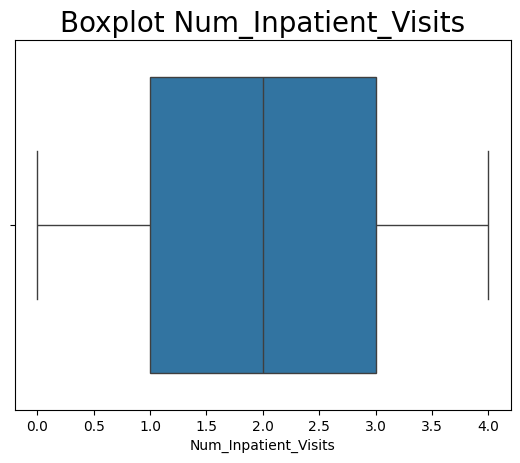

In [24]:
plt.title("Boxplot Num_Inpatient_Visits", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Num_Inpatient_Visits"])

<Axes: title={'center': 'Boxplot Num_Outpatient_Visits'}, xlabel='Num_Outpatient_Visits'>

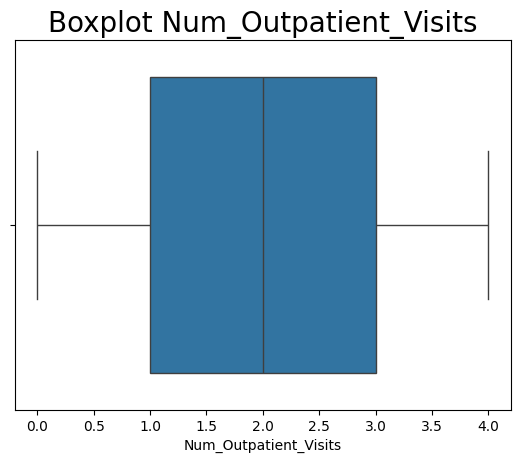

In [25]:

plt.title("Boxplot Num_Outpatient_Visits", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Num_Outpatient_Visits"])

<Axes: title={'center': 'Boxplot Num Lab Procedures'}, xlabel='Num_Lab_Procedures'>

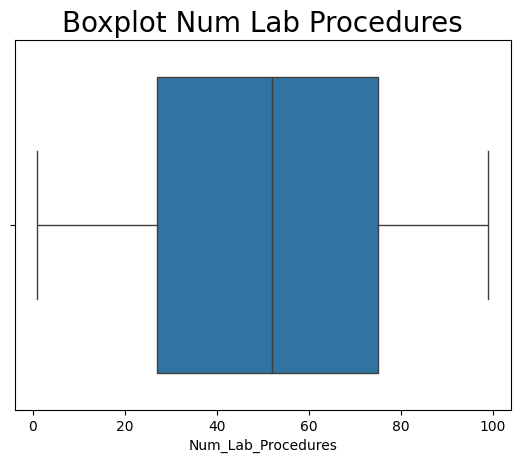

In [26]:
plt.title("Boxplot Num Lab Procedures", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Num_Lab_Procedures"])

<Axes: title={'center': 'Boxplot Num_Diagnoses'}, xlabel='Num_Diagnoses'>

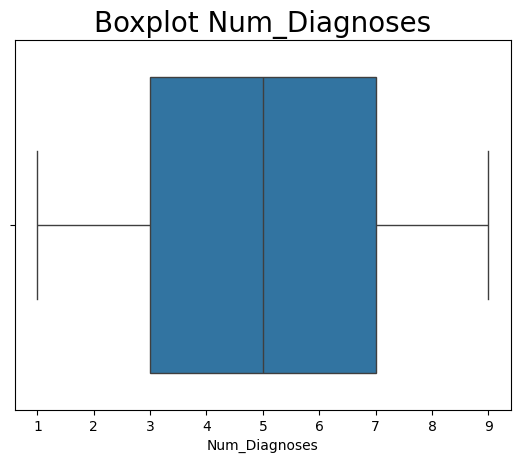

In [27]:
plt.title("Boxplot Num_Diagnoses", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Num_Diagnoses"])

<Axes: title={'center': 'Boxplot Num_Medications'}, xlabel='Num_Medications'>

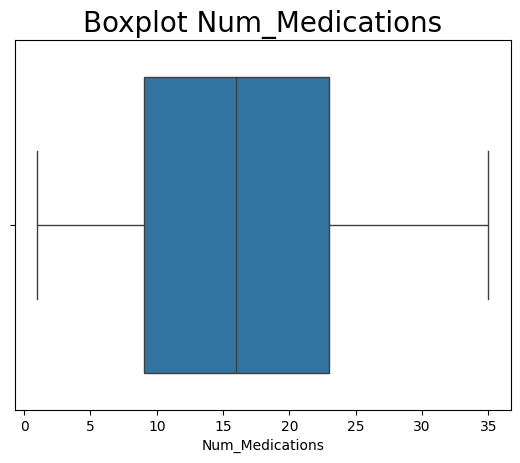

In [28]:
plt.title("Boxplot Num_Medications", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Num_Medications"])

### 2. Data Analysis

In [29]:
# Define the variables and their binning if necessary
variables = df.columns.tolist()
variables

['Age',
 'Gender',
 'Admission_Type',
 'Diagnosis',
 'Num_Lab_Procedures',
 'Num_Medications',
 'Num_Outpatient_Visits',
 'Num_Inpatient_Visits',
 'Num_Emergency_Visits',
 'Num_Diagnoses',
 'A1C_Result',
 'Readmitted']

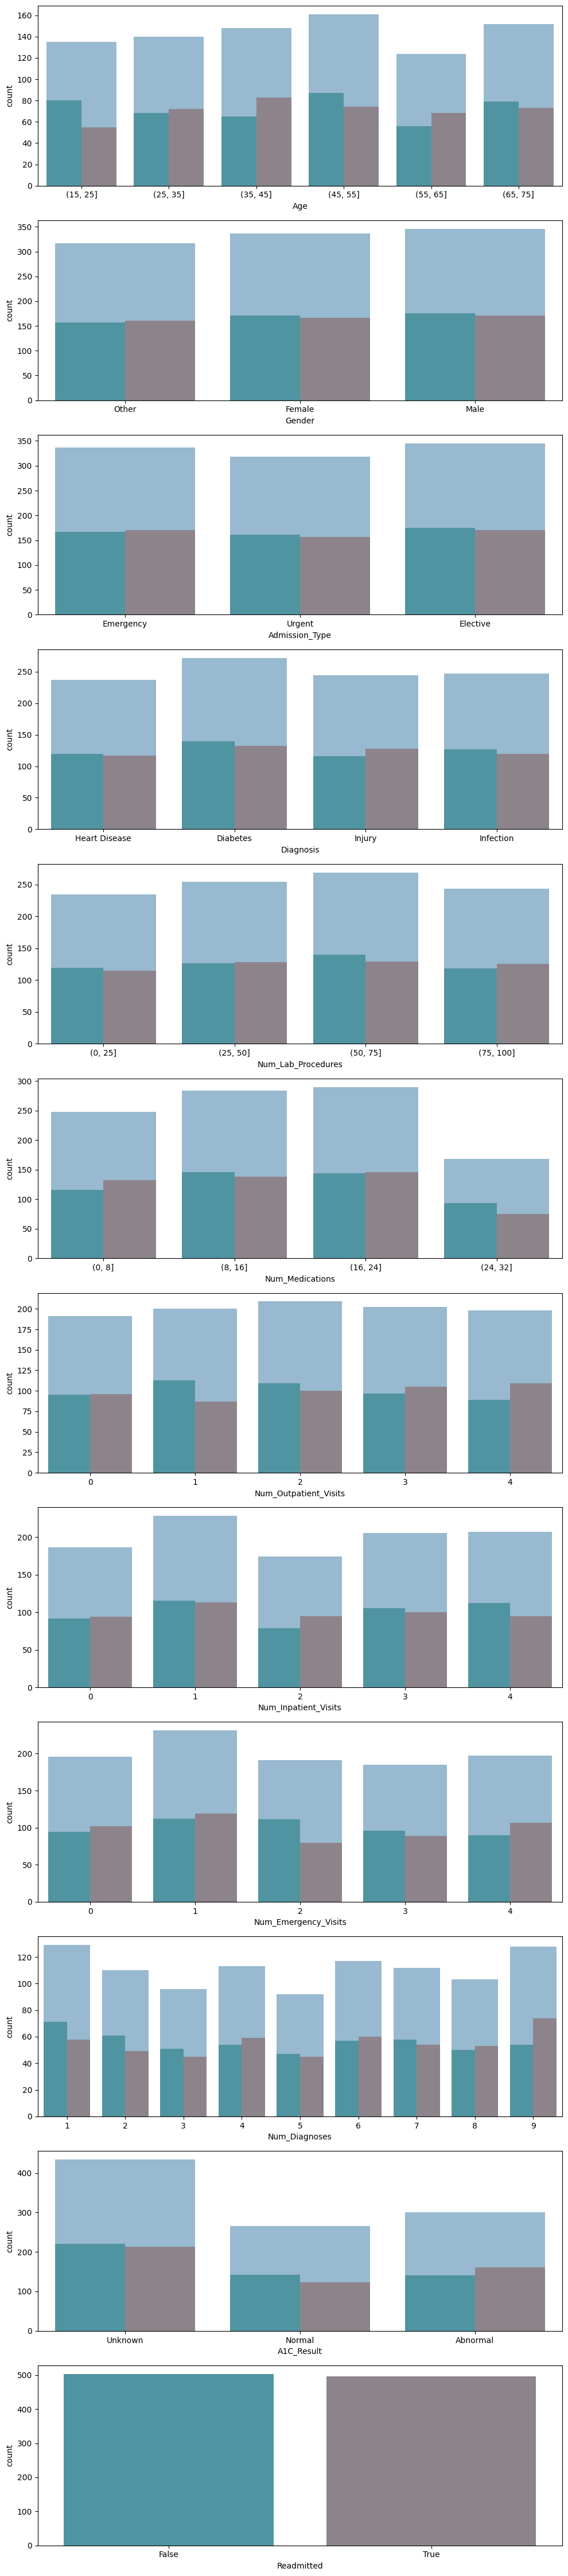

In [30]:
bin_ranges = [range(15, 85, 10), None, None, None, range(0, 101, 25), range(0, 40, 8), None, None, None, None, None, None]  # Define bin ranges for respective variables

plt.figure(figsize=(10, 45))
# Define the figure size
#plt.figure(figsize=(15, 100))
# Loop over the variables and create subplots
for i, (var, bins) in enumerate(zip(variables, bin_ranges), start=1):


    plt.subplot(len(bin_ranges), 1, i)
    #plt.gca().set_title(var)
    
    if bins:

        # Plot the count plot
        sns.countplot(x=pd.cut(df[var], bins=bins), palette='Set2', hue='Readmitted',  data=df, ax=plt.gca(), legend=False)
        # Plot the count plot for the X-variable without hue
        sns.countplot(x=pd.cut(df[var], bins=bins),  data=df, ax=plt.gca(), alpha=0.5, legend=False)
        
        
    else:

        # Plot the count plot
        sns.countplot(x=var, palette='Set2', hue='Readmitted', data=df, ax=plt.gca(), legend=False)
        sns.countplot(x=var, data=df, ax=plt.gca(), alpha=0.5, legend=False)
        # Plot the count plot for the X-variable without hue
        #sns.countplot(x=pd.cut(df[var], bins=bin_range), palette='Set2', data=df, ax=plt.gca(), alpha=0.5)
    
    
plt.tight_layout()
plt.show()

In [31]:
# Define the variables and their binning if necessary
variables = df.select_dtypes(exclude=['object', 'bool']).columns.tolist()
variables

['Age',
 'Num_Lab_Procedures',
 'Num_Medications',
 'Num_Outpatient_Visits',
 'Num_Inpatient_Visits',
 'Num_Emergency_Visits',
 'Num_Diagnoses']

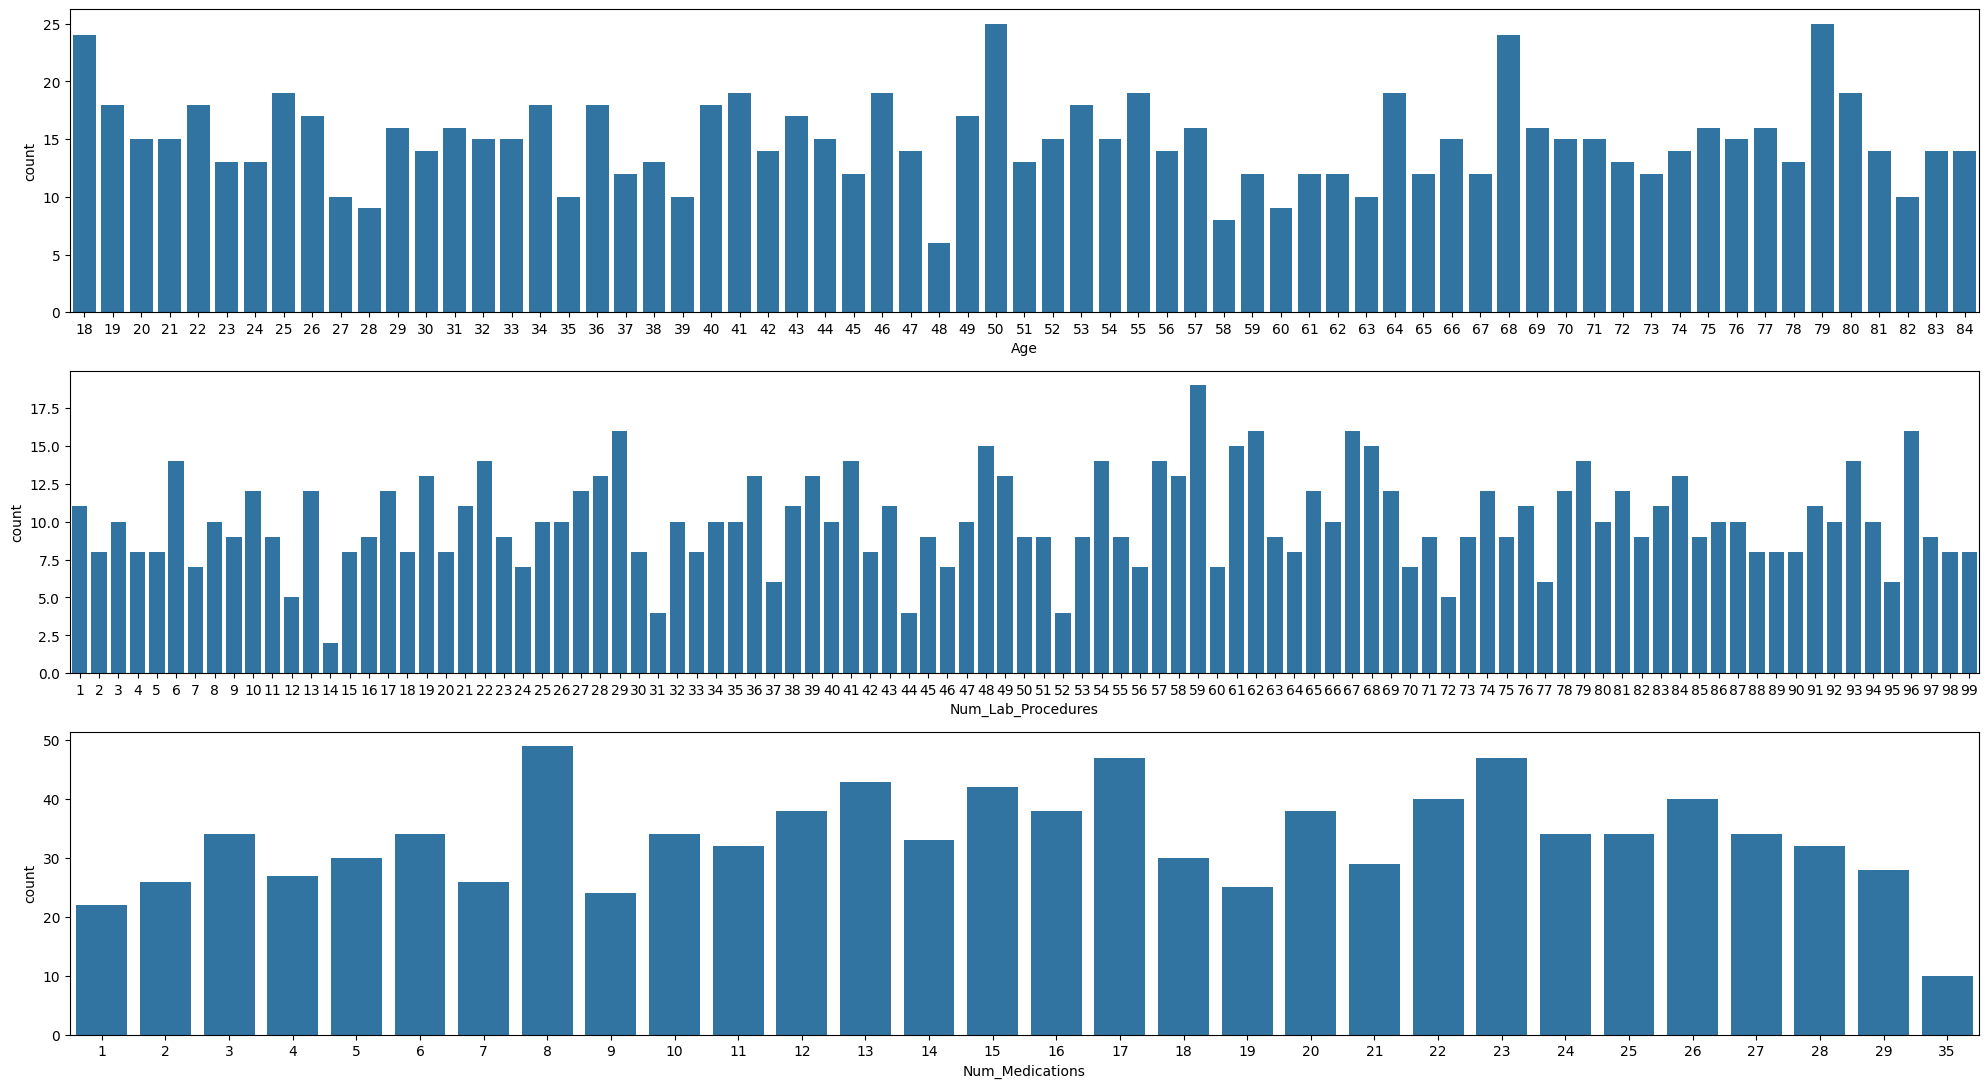

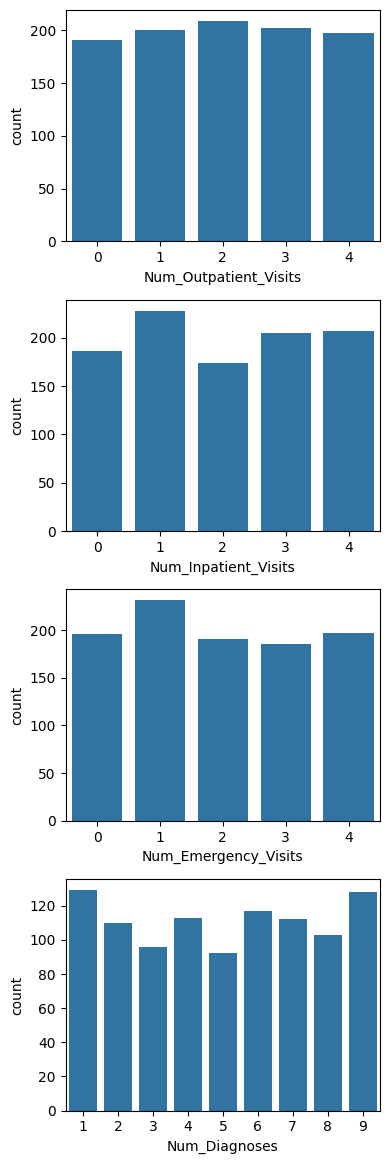

In [32]:
bin_ranges = [None, None, None, None, None, None, None]  # Define bin ranges for respective variables

plt.figure(figsize=(20, 25))
# Define the figure size
#plt.figure(figsize=(15, 100))
# Loop over the variables and create subplots
for i, (var, bins) in enumerate(zip(variables[:3], bin_ranges[:3]), start=1):


    plt.subplot(len(bin_ranges), 1, i)
    #plt.gca().set_title(var)

    # Plot the count plot
    ax = sns.countplot(x=var, data=df, alpha=1., legend=False)
    # Calculate the line data (e.g., mean)
    line_data = df.groupby(var).size().reset_index(name='count').sort_values(by=var)

    #display(line_data)
    # Plot the line using Seaborn's lineplot
    #sns.lineplot(x=var, y='count', data=line_data, color='red', marker='o')
    # Plot the count plot for the X-variable without hue
    #sns.countplot(x=pd.cut(df[var], bins=bin_range), palette='Set2', data=df, ax=plt.gca(), alpha=0.5)

    
plt.tight_layout()
plt.show()
#####################################################
plt.figure(figsize=(4, 20))
# Define the figure size
#plt.figure(figsize=(15, 100))
# Loop over the variables and create subplots
for i, (var, bins) in enumerate(zip(variables[3:], bin_ranges[3:]), start=1):


    plt.subplot(len(bin_ranges), 1, i)
    #plt.gca().set_title(var)

    # Plot the count plot
    ax = sns.countplot(x=var, data=df, alpha=1., legend=False)
    # Calculate the line data (e.g., mean)
    line_data = df.groupby(var).size().reset_index(name='count').sort_values(by=var)

    #display(line_data)
    # Plot the line using Seaborn's lineplot
    #sns.lineplot(x=var, y='count', data=line_data, color='red', marker='o')
    # Plot the count plot for the X-variable without hue
    #sns.countplot(x=pd.cut(df[var], bins=bin_range), palette='Set2', data=df, ax=plt.gca(), alpha=0.5)

    
plt.tight_layout()
plt.show()

### 3. Feature Engineering 

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, RobustScaler 
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [114]:
X = df.drop(columns=['Readmitted'])
y = df[['Readmitted']]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


#### a. Categorical Variables

In [116]:
age_bins = [15, 30, 60, 90]  # custom age bins
age_labels = ['Young_Adult', 'Middle_Aged', 'Senior']
X_train['Age_Group'] = pd.cut(X_train['Age'], bins=age_bins, labels=age_labels, right=False)

In [117]:
num_diag_bins = [0, 3, 6, 10]  # assuming 0-3 as low, 3-6 as medium, and above 6 as high
num_diag_labels = ['Low', 'Medium', 'High']
X_train['Num_Diagnoses_Group'] = pd.cut(X_train['Num_Diagnoses'], bins=num_diag_bins, labels=num_diag_labels)

In [118]:
num_med_bins = [0, 10, 20, 36]  # assuming 0-3 as low, 3-6 as medium, and above 6 as high
num_med_labels = ['Low', 'Medium', 'High']
X_train['Num_Medications_Group'] = pd.cut(X_train['Num_Medications'], bins=num_med_bins, labels=num_med_labels)

In [119]:
X_test['Age_Group'] = pd.cut(X_test['Age'], bins=age_bins, labels=age_labels, right=False)
# Age Group Encoding
# age_group_encoded = age_group_encoder.transform(X_test[['Age_Group']])
# age_group_df = pd.DataFrame(age_group_encoded.toarray(), columns=age_group_columns)
# X_test = pd.concat([X_test, age_group_df], axis=1)

In [120]:
X_test['Num_Diagnoses_Group'] = pd.cut(X_test['Num_Diagnoses'], bins=num_diag_bins, labels=num_diag_labels)
# Number of Diagnoses Grouping
# num_diagnoses_group_encoded = num_diagnoses_group_encoder.transform(X_test[['Num_Diagnoses_Group']])
# num_diagnoses_group_df = pd.DataFrame(num_diagnoses_group_encoded.toarray(), columns=num_diagnoses_group_columns)
# X_test = pd.concat([X_test, num_diagnoses_group_df], axis=1)

In [121]:
X_test['Num_Medications_Group'] = pd.cut(X_test['Num_Medications'], bins=num_med_bins, labels=num_med_labels)

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    800 non-null    int64   
 1   Gender                 800 non-null    object  
 2   Admission_Type         800 non-null    object  
 3   Diagnosis              800 non-null    object  
 4   Num_Lab_Procedures     800 non-null    int64   
 5   Num_Medications        800 non-null    int64   
 6   Num_Outpatient_Visits  800 non-null    int64   
 7   Num_Inpatient_Visits   800 non-null    int64   
 8   Num_Emergency_Visits   800 non-null    int64   
 9   Num_Diagnoses          800 non-null    int64   
 10  A1C_Result             800 non-null    object  
 11  Age_Group              800 non-null    category
 12  Num_Diagnoses_Group    800 non-null    category
 13  Num_Medications_Group  800 non-null    category
dtypes: category(3), int64(7), object(4)
memory

#### b. Continuous Variables

In [123]:
num_columns = X_train.select_dtypes(exclude=['object', 'bool', 'category']).columns.tolist()
non_num_columns = X_train.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

##### i. StandardScaler (Continous Variables)

In [124]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler = QuantileTransformer()
#scaler = PowerTransformer()
#scaler = RobustScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (800). n_quantiles is set to n_samples.
  warnings.warn(


In [125]:
X_test.shape

(200, 14)

##### ii. MinMaxScaler 

In [666]:
# ct = make_column_transformer((MinMaxScaler(), num_columns), remainder='passthrough')
# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=num_columns+non_num_columns)  # Add column names accordingly
# X_test = pd.DataFrame(X_test, columns=num_columns+non_num_columns)  # Add column names accordingly

#### c. Encoding Categorial Variables

In [126]:
X_train[num_columns] = X_train[num_columns].astype(float)
X_test[num_columns] = X_test[num_columns].astype(float)

In [127]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           800 non-null    float64
 1   Num_Lab_Procedures            800 non-null    float64
 2   Num_Medications               800 non-null    float64
 3   Num_Outpatient_Visits         800 non-null    float64
 4   Num_Inpatient_Visits          800 non-null    float64
 5   Num_Emergency_Visits          800 non-null    float64
 6   Num_Diagnoses                 800 non-null    float64
 7   Gender_Female                 800 non-null    bool   
 8   Gender_Male                   800 non-null    bool   
 9   Gender_Other                  800 non-null    bool   
 10  Admission_Type_Elective       800 non-null    bool   
 11  Admission_Type_Emergency      800 non-null    bool   
 12  Admission_Type_Urgent         800 non-null    bool   
 13  Diagn

In [129]:
X_train.head().T

,0,1,2,3,4
Age,0.954318,0.202753,0.822278,0.0,0.394243
Num_Lab_Procedures,0.03567,0.448686,0.437422,0.257822,0.413016
Num_Medications,0.435544,0.228411,0.552566,0.650188,0.295995
Num_Outpatient_Visits,0.697747,0.489987,0.697747,1.0,1.0
Num_Inpatient_Visits,1.0,0.695244,0.0,0.507509,0.695244
Num_Emergency_Visits,1.0,0.314143,0.523154,0.523154,0.314143
Num_Diagnoses,0.819149,0.709011,1.0,0.182728,0.709011
Gender_Female,False,False,True,False,False
Gender_Male,True,True,False,False,True
Gender_Other,False,False,False,True,False


#### New Features

In [130]:
# # Define the conditions
# condition_1 = df['Num_Lab_Procedures'].between(10, 20)
# condition_2 = df['Num_Lab_Procedures'].between(25, 35)
# condition_3 = df['Num_Lab_Procedures'].between(40, 45)
# condition_4 = df['Num_Lab_Procedures'].between(50, 55)
# condition_5 = df['Num_Lab_Procedures'].between(85, 95)
# # Create a new column based on the conditions
# df['NLP_10to20_25to35_40to45_50to55_85to95'] = pd.Series(np.where(condition_1 | condition_2 | condition_3 | condition_4 | condition_5, True, False), index=df.index)

# df['ND_gt9'] = df['Num_Diagnoses'].apply(lambda x: False if x < 9 else True)
# df['NM_lt9'] = df['Num_Medications'].apply(lambda x: True if x < 9 else False)
# df['NIP_eq2'] = df['Num_Inpatient_Visits'].apply(lambda x: True if x == 2 else False)
# df['NOP_gt2'] = df['Num_Outpatient_Visits'].apply(lambda x: True if x > 2 else False)
# df['NEP_gt2'] = df['Num_Emergency_Visits'].apply(lambda x: True if x == 0 | x == 1 | x == 4 else False)
# #df['ND_gt9'] = pd.Series(np.where(condition_1 | condition_2 | condition_3 | condition_4 | condition_5, True, False), index=df.index)


#### 4. Feature Selection

<Axes: >

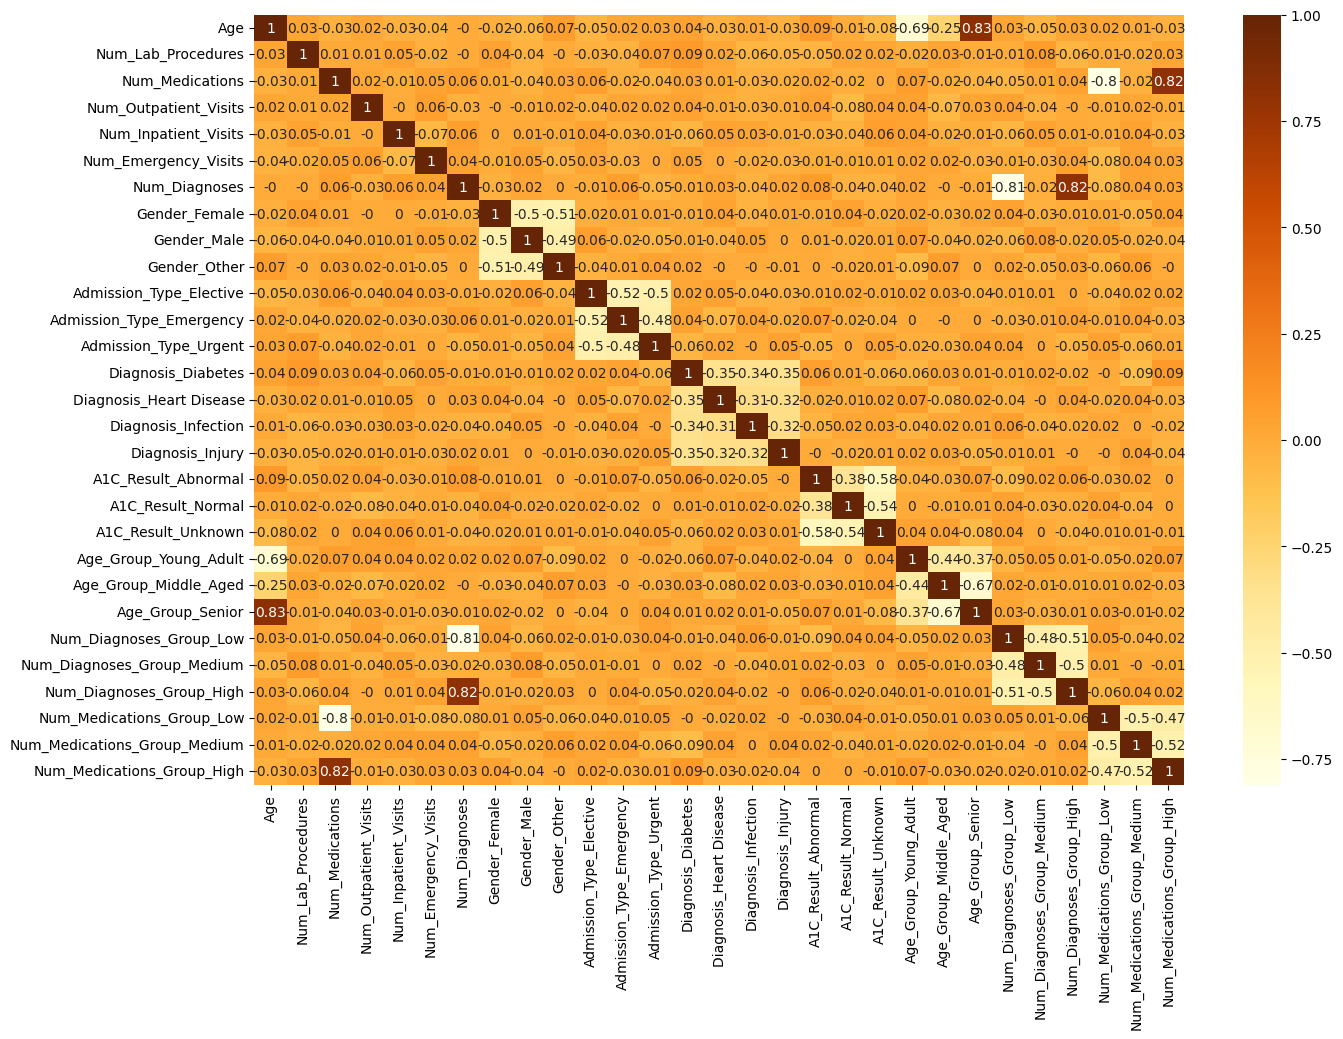

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X_train.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

Good thing is that the independent variables are not that dependent on any other. All of them are independent. However, there is a warning


1. Seems like the target variable `Readmitted` does not have any strong dependence on any of the independent variable.
2. This might be lead to unaccurate modelling. May be not satisfactory.
3. Either the size of the dataset has to be increased or may be a different feature selection or feature engineering has to be done. 
4. A stack of algorithms such as ADABoost, Gradient Boost, RandomForest stacked togethor could be a solution for this small dataset. 

### 5. Data Modeling

In [132]:
# !pip install six
# !pip install pydotplus
# !pip install graphviz

In [133]:
# from IPython.display import Image
# from six import StringIO
# from sklearn.tree import export_graphviz
# import pydotplus, graphviz

#### Comparison of various classifiers using forward selection technique

In [134]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split


# # df = pd.read_csv("hospital_readmissions.csv")


# # final_hosp_data = df[df['Age'] < 150]
# # final_hosp_data_outlier = df[df['Age'] == 150].reset_index()
# # #display(final_hosp_data_outlier)
# # for i in range(len(final_hosp_data_outlier)):

# #     gender = final_hosp_data_outlier['Gender'].loc[i]
# #     admission_type = final_hosp_data_outlier['Admission_Type'].loc[i]
# #     diagnosis = final_hosp_data_outlier['Diagnosis'].loc[i]
# #     num_lab_procedures = final_hosp_data_outlier['Num_Lab_Procedures'].loc[i]
# #     ind = final_hosp_data_outlier['index'].loc[i]
    
# #     age_outlier = final_hosp_data[(final_hosp_data['Gender'] == gender) & (final_hosp_data['Admission_Type'] == admission_type) 
# #                          & (final_hosp_data['Num_Lab_Procedures'] > num_lab_procedures-10) & (final_hosp_data['Diagnosis'] == diagnosis) ]
# #     #display()
# #     #print('Patient_ID', df.loc[ind, 'Patient_ID'], 'Age =', df.loc[ind, 'Age'], " --> ", int(age_outlier['Age'].mean()))
# #     #print(age_outlier['Age'].mode())
# #     df.loc[ind, 'Age'] =  int(age_outlier['Age'].mean()) 

# # df['A1C_Result'] = df['A1C_Result'].fillna('Unknown')

# #print(df['Age'].unique())

# X = df.drop(columns=['Readmitted', 'Patient_ID'])
# y = df[['Readmitted']]

# ###################################################################################################
# #                                       Train
# ###################################################################################################

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)
# # Feature Engineering
# display(X_test.head().T)

In [135]:
# # Age Grouping
# age_bins = [15, 30, 60, 90]  # custom age bins
# age_labels = ['Young_Adult', 'Middle_Aged', 'Senior']
# X_train['Age_Group'] = pd.cut(X_train['Age'], bins=age_bins, labels=age_labels, right=False)

# # Age Group Encoding
# age_group_encoder = OneHotEncoder()
# age_group_encoded = age_group_encoder.fit_transform(X_train[['Age_Group']])
# age_group_columns = [f"Age_Group_{category}" for category in age_group_encoder.categories_[0]]
# age_group_df = pd.DataFrame(age_group_encoded.toarray(), columns=age_group_columns)
# X_train = pd.concat([X_train, age_group_df], axis=1)

# # Number of Diagnoses Grouping
# num_diag_bins = [0, 3, 6, 10]  # assuming 0-3 as low, 3-6 as medium, and above 6 as high
# num_diag_labels = ['Low', 'Medium', 'High']
# X_train['Num_Diagnoses_Group'] = pd.cut(X_train['Num_Diagnoses'], bins=num_diag_bins, labels=num_diag_labels)
# # Num Diagnoses Group Encoding
# num_diagnoses_group_encoder = OneHotEncoder()
# num_diagnoses_group_encoded = num_diagnoses_group_encoder.fit_transform(X_train[['Num_Diagnoses_Group']])
# num_diagnoses_group_columns = [f"Num_Diagnoses_Group_{category}" for category in num_diagnoses_group_encoder.categories_[0]]
# num_diagnoses_group_df = pd.DataFrame(num_diagnoses_group_encoded.toarray(), columns=num_diagnoses_group_columns)
# X_train = pd.concat([X_train, num_diagnoses_group_df], axis=1)





# # Gender Encoding
# gender_encoder = OneHotEncoder()
# gender_encoded = gender_encoder.fit_transform(X_train[['Gender']])
# gender_columns = [f"Gender_{category}" for category in gender_encoder.categories_[0]]
# gender_df = pd.DataFrame(gender_encoded.toarray(), columns=gender_columns)
# X_train = pd.concat([X_train, gender_df], axis=1)

# # Admission Type Encoding
# admission_encoder = OneHotEncoder()
# admission_encoded = admission_encoder.fit_transform(X_train[['Admission_Type']])
# admission_columns = [f"Admission_Type_{category}" for category in admission_encoder.categories_[0]]
# admission_df = pd.DataFrame(admission_encoded.toarray(), columns=admission_columns)
# X_train = pd.concat([X_train, admission_df], axis=1)

# # A1C Result Encoding
# a1c_encoder = OneHotEncoder()
# a1c_encoded = a1c_encoder.fit_transform(X_train[['A1C_Result']])
# a1c_columns = [f"A1C_Result_{category}" for category in a1c_encoder.categories_[0]]
# a1c_df = pd.DataFrame(a1c_encoded.toarray(), columns=a1c_columns)
# X_train = pd.concat([X_train, a1c_df], axis=1)


# numerical_features = ['Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses']
# scaler = StandardScaler()
# X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# ###################################################################################################
# #                                       Test
# ###################################################################################################

# X_test['Age_Group'] = pd.cut(X_test['Age'], bins=age_bins, labels=age_labels, right=False)
# # Age Group Encoding
# age_group_encoded = age_group_encoder.transform(X_test[['Age_Group']])
# age_group_df = pd.DataFrame(age_group_encoded.toarray(), columns=age_group_columns)
# X_test = pd.concat([X_test, age_group_df], axis=1)


# X_test['Num_Diagnoses_Group'] = pd.cut(X_test['Num_Diagnoses'], bins=num_diag_bins, labels=num_diag_labels)
# # Number of Diagnoses Grouping
# num_diagnoses_group_encoded = num_diagnoses_group_encoder.transform(X_test[['Num_Diagnoses_Group']])
# num_diagnoses_group_df = pd.DataFrame(num_diagnoses_group_encoded.toarray(), columns=num_diagnoses_group_columns)
# X_test = pd.concat([X_test, num_diagnoses_group_df], axis=1)

# # Gender Encoding
# gender_encoded = gender_encoder.transform(X_test[['Gender']])
# gender_df = pd.DataFrame(gender_encoded.toarray(), columns=gender_columns)
# X_test = pd.concat([X_test, gender_df], axis=1)

# # Admission Type Encoding
# admission_encoded = admission_encoder.transform(X_test[['Admission_Type']])
# admission_df = pd.DataFrame(admission_encoded.toarray(), columns=admission_columns)
# X_test = pd.concat([X_test, admission_df], axis=1)

# # A1C Result Encoding
# a1c_encoded = a1c_encoder.transform(X_test[['A1C_Result']])
# a1c_df = pd.DataFrame(a1c_encoded.toarray(), columns=a1c_columns)
# X_test = pd.concat([X_test, a1c_df], axis=1)


# X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [136]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [137]:
X_train.describe()

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.499674,0.499924,0.499730,0.499377,0.500979,0.500884,0.499860
std,0.289918,0.289401,0.289518,0.338899,0.338809,0.340665,0.313044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244055,0.245307,0.228411,0.292866,0.309762,0.314143,0.284731
50%,0.490613,0.501877,0.511264,0.489987,0.507509,0.523154,0.488110
75%,0.748436,0.752190,0.764706,0.697747,0.695244,0.705882,0.709011
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Forward Selection

In [138]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier



# Define the top 7 classifier models
models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Cat Boost": CatBoostClassifier(verbose=0)
    # "Light GBM": LGBMClassifier(n_estimators=100)
}

final_results = {}

# Iterate over the models
for model_name, model in models.items():
    # Initialize an empty set to store selected features
    selected_features = []
    
    # Add the first feature in X_train.columns
    selected_features.append(X_train.columns[0])

    # Train the initial model with the selected feature
    model.fit(X_train[selected_features], y_train)

    # Calculate initial accuracy
    initial_accuracy = accuracy_score(y_test, model.predict(X_test[selected_features]))

    # Loop until all features are selected
    while len(selected_features) < len(X_train.columns):
        best_feature = None
        best_accuracy = initial_accuracy
        # Iterate through remaining features
        for feature in X_train.columns:
            if feature not in selected_features:
                # Add the feature and train the model
                selected_features.append(feature)
                model.fit(X_train[selected_features], y_train)
                # Calculate accuracy with the new feature
                accuracy = accuracy_score(y_test, model.predict(X_test[selected_features]))
                # If accuracy improved, update best_feature and best_accuracy
                if accuracy > best_accuracy:
                    best_feature = feature
                    best_accuracy = accuracy
                # Remove the feature for next iteration
                selected_features.remove(feature)
        # If a better feature is found, add it to selected_features
        if best_feature:
            selected_features.append(best_feature)
            initial_accuracy = best_accuracy
        else:
            # If no better feature is found, break the loop
            break

    # Train final model with selected features
    model.fit(X_train[selected_features], y_train)

    # Calculate final accuracy
    final_accuracy = accuracy_score(y_test, model.predict(X_test[selected_features]))
    # Calculate classification report
    report = classification_report(y_test, model.predict(X_test[selected_features]), target_names=['Yes', 'No'], output_dict=True)

    params = model.get_params()
    # Store the final accuracy and classification report for the model
    final_results[model_name] = {'accuracy': final_accuracy, 'classification_report': report, 'features': selected_features,
                                'params': params, 'model': model}

# Print final results for each model
for model_name, results in final_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['accuracy']}")
    print(f"Params: {results['params']}")
    print("Classification Report:")
    print(results['classification_report'])
    print(results['features'])
    print("-------------------------------------------------------")


Model: Random Forest
Accuracy: 0.605
Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Classification Report:
{'Yes': {'precision': 0.6122448979591837, 'recall': 0.594059405940594, 'f1-score': 0.6030150753768844, 'support': 101.0}, 'No': {'precision': 0.5980392156862745, 'recall': 0.6161616161616161, 'f1-score': 0.6069651741293532, 'support': 99.0}, 'accuracy': 0.605, 'macro avg': {'precision': 0.605142056822729, 'recall': 0.605110511051105, 'f1-score': 0.6049901247531189, 'support': 200.0}, 'weighted avg': {'precision': 0.6052130852340936, 'recall': 0.605, 'f1-score': 0.6049703742593564, 'support': 200.0}}
['Age', 'Di

#### Hyper Tuning of Best performing algorithm

In [482]:
# Print final results for each model
selected_features = final_results['Decision Tree']['features']

Accuracy: 0.645


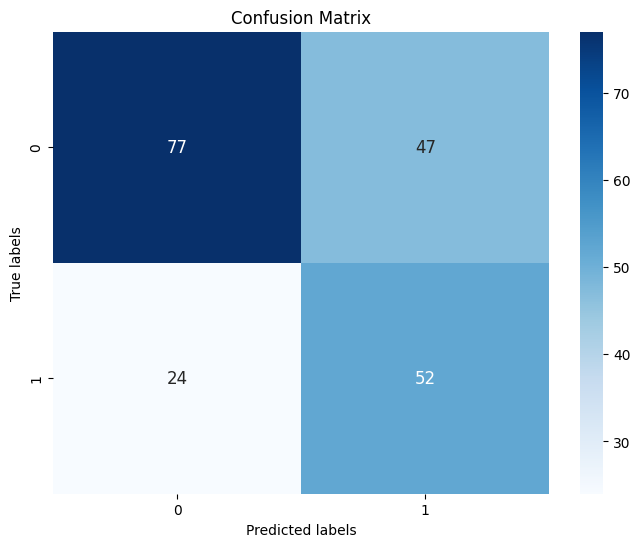

In [483]:

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

# Define the parameter grid with more parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(2,5),
    'min_samples_leaf': [1, 2, 3, 4],
    # 'max_features': ['sqrt', 'log2', None],
    # 'splitter': ['best', 'random'],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    # 'max_leaf_nodes': [None, 5, 10, 20]
}

# Instantiate Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

# Perform Grid Search Cross-Validation
grid_search.fit(X_train1, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
dt_classifier_best = DecisionTreeClassifier(**best_params)
dt_classifier_best.fit(X_train1, y_train)

# Evaluate performance
accuracy = dt_classifier_best.score(X_test1, y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(dt_classifier_best.predict(X_test1), y_test)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [145]:
# Print final results for each model
selected_features = final_results['SVM']['features']

In [146]:
final_results['SVM']['params']

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Choosen classifier: SVM 

Accuracy: 0.65


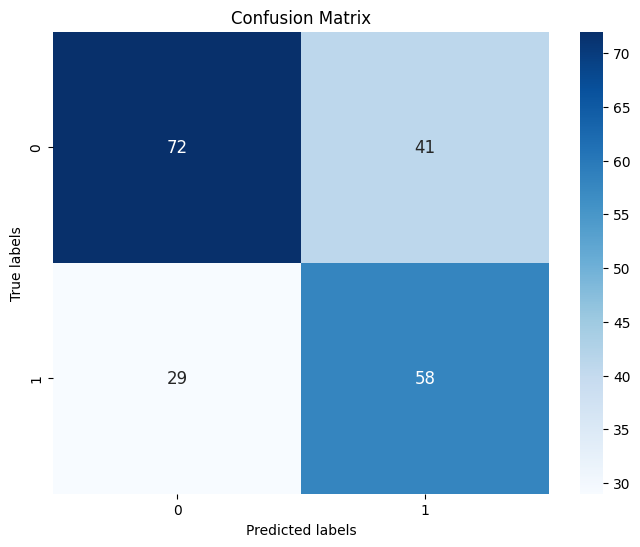

In [154]:

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]



param_grid = {
    'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],             # Regularization parameter
    'kernel': ['linear','rbf'],# Kernel type: linear, radial basis function (RBF), polynomial
    'gamma': ['scale', 0, 0.1, 1]  # Kernel coefficient (only for 'rbf' and 'poly' kernels)
}


# Instantiate Decision Tree classifier
classifier = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=8, scoring=('accuracy'))

# Perform Grid Search Cross-Validation
grid_search.fit(X_train1, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
classifier_best = SVC(**best_params)
classifier_best.fit(X_train1, y_train)

# Evaluate performance
accuracy = classifier_best.score(X_test1, y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(classifier_best.predict(X_test1), y_test)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [155]:
classification_report(y_test, classifier_best.predict(X_test1), target_names=['Yes', 'No'], output_dict=True)

{'Yes': {'precision': 0.6371681415929203,
  'recall': 0.7128712871287128,
  'f1-score': 0.6728971962616822,
  'support': 101.0},
 'No': {'precision': 0.6666666666666666,
  'recall': 0.5858585858585859,
  'f1-score': 0.6236559139784946,
  'support': 99.0},
 'accuracy': 0.65,
 'macro avg': {'precision': 0.6519174041297935,
  'recall': 0.6493649364936493,
  'f1-score': 0.6482765551200884,
  'support': 200.0},
 'weighted avg': {'precision': 0.6517699115044248,
  'recall': 0.65,
  'f1-score': 0.6485227615315045,
  'support': 200.0}}

In [147]:
svm_model = final_results['SVM']['model']

In [152]:
val_accuracy = final_results['SVM']['accuracy']

In [149]:
# Evaluate the model on the training set
train_preds = svm_model.predict(X_test[selected_features])
train_accuracy = accuracy_score(y_test, train_preds)

In [153]:
# Compare the training and validation accuracies to assess overfitting
if train_accuracy > val_accuracy:
    print("Overfitting is likely occurring.")
else:
    print("Overfitting is not likely occurring.")

Overfitting is not likely occurring.


In [171]:
columns = svm_model.feature_names_in_
result = permutation_importance(svm_model, X_train[selected_features], y_train)

# Get the mean importance of each feature
importances = result.importances_mean

# Create a Pandas Series with feature importances
feature_imp = pd.Series(importances, index=columns).sort_values(ascending=False)

In [172]:
feature_imp

Gender_Male                   0.05875
Age                           0.03725
Num_Inpatient_Visits          0.03675
Diagnosis_Heart Disease       0.03600
Num_Medications               0.02250
Num_Emergency_Visits          0.02100
Num_Diagnoses_Group_Low       0.01650
Num_Diagnoses_Group_Medium    0.01275
Num_Diagnoses                 0.00975
Num_Diagnoses_Group_High      0.00875
dtype: float64

In [174]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X_train[selected_features]
target = y_train

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
Num_Diagnoses_Group_Low,0.71
Num_Diagnoses_Group_High,0.47
Age,0.38
Num_Diagnoses,0.21
Num_Medications,0.19
Num_Inpatient_Visits,0.03
Num_Diagnoses_Group_Medium,0.02
Gender_Male,0.01
Diagnosis_Heart Disease,0.00
Num_Emergency_Visits,0.00
